# Opensees uniaxialMaterial Demo: HystereticSM
## Silvia Mazzoni, 2023
### silviamazzoni@yahoo.com

## Initialize Notebook

In [1]:
import sys 

OpenSeesPyPath = r'D:\Projects\OpenSees\Development\OpenSeesFork\Win64\bin' 
sys.path.append(OpenSeesPyPath) 
import opensees as ops 

# import openseespy.opensees as ops
# ------------------
#  initialize
# ------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# https://github.com/jupyter-widgets/ipywidgets/issues/1853
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots
#%matplotlib notebook

import glob
import urllib
import webbrowser
from ipywidgets import widgets, Output
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
from IPython.display import display
from IPython.display import clear_output
from IPython.display import HTML
from IPython.display import Image
from IPython.display import Javascript
from urllib.parse import urljoin
from urllib.request import pathname2url
from pathlib import Path
from datetime import date
import os
from os.path import expanduser
#http://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html
#https://stackoverflow.com/questions/22487231/how-to-start-a-batch-file-from-within-a-python-script-and-detach-from-it
import subprocess

#from ipysheet import sheet, cell, row, column, cell_range,from_dataframe,to_dataframe
pd.set_option("display.max_rows", None)
np.set_printoptions(threshold=np.inf)
plt.interactive(True)

## Define Strain Histories

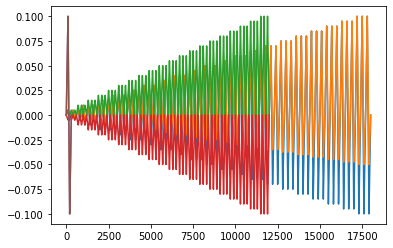

In [2]:
strainMap = {}
def defineStrainHistory(peaksArray,scaleFactor,nSteps,nCycles):
    strain = []
    for thisPeak in peaksArray:
        for i in range(nCycles):
            strain = np.append(strain,np.linspace(0,thisPeak*scaleFactor,nSteps))
            strain = np.append(strain,np.linspace(thisPeak*scaleFactor,-thisPeak*scaleFactor,nSteps))
            strain = np.append(strain,np.linspace(-thisPeak*scaleFactor,0,nSteps))

    return strain

def defineStrainHistoryOneSided(peaksArray,scaleFactor,nSteps,nCycles):
    strain = []
    for thisPeak in peaksArray:
        for i in range(nCycles):
            strain = np.append(strain,np.linspace(0,thisPeak*scaleFactor,nSteps))
            strain = np.append(strain,np.linspace(thisPeak*scaleFactor,0,nSteps))

    return strain

def defineStrainHistoryUnsymm(peaksArray,scaleFactor,nSteps,nCycles):
    strain = []
    for thisPeak in peaksArray:
        for i in range(nCycles):
            strain = np.append(strain,np.linspace(0,thisPeak*scaleFactor,nSteps))
            strain = np.append(strain,np.linspace(thisPeak*scaleFactor,-thisPeak*scaleFactor/2,nSteps))
            strain = np.append(strain,np.linspace(-thisPeak*scaleFactor/2,0,nSteps))

    return strain

def defineStrainHistoryDip(peaksArray,scaleFactor,nSteps,nCycles):
    strain = []
    for thisPeak in peaksArray:
        for i in range(nCycles):
            strain = np.append(strain,np.linspace(0,thisPeak/2*scaleFactor,nSteps))
            strain = np.append(strain,np.linspace(thisPeak/2*scaleFactor,-thisPeak/2*scaleFactor,nSteps))
            strain = np.append(strain,np.linspace(-thisPeak/2*scaleFactor,thisPeak/2*scaleFactor,nSteps))
            strain = np.append(strain,np.linspace(thisPeak/2*scaleFactor,thisPeak*scaleFactor,nSteps))
    return strain

peaksArray=np.array([.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10])/10
# peaksArray=[1,10]
scaleFactor = .1
# scaleFactor = 0.01
nSteps = 100
nCycles = 3
strain=defineStrainHistory(peaksArray,scaleFactor,nSteps,nCycles)
plt.plot(strain)
strainMap['symmCycles'] = strain

strainUnsymm=defineStrainHistoryUnsymm(peaksArray,scaleFactor,nSteps,nCycles)
plt.plot(strainUnsymm)
strainMap['strainUnsymm'] = strainUnsymm

strainOneSidedPush=defineStrainHistoryOneSided(peaksArray,scaleFactor,nSteps,nCycles)
plt.plot(strainOneSidedPush)
strainMap['strainOneSidedPush'] = strainOneSidedPush

strainOneSidedPull=defineStrainHistoryOneSided(peaksArray,-scaleFactor,nSteps,nCycles)
plt.plot(strainOneSidedPull)
strainMap['strainOneSidedPull'] = strainOneSidedPull

peaksArray=np.array([10])/10
scaleFactor = .1
nSteps = 100
nCycles = 1
strainOneCycle=defineStrainHistory(peaksArray,scaleFactor,nSteps,nCycles)
plt.plot(strainOneCycle)
strainMap['strainOneCycle'] = strainOneCycle

peaksArray=np.array([10])/10
scaleFactor = .1
nSteps = 100
nCycles = 1
strainDip=defineStrainHistoryDip(peaksArray,scaleFactor,nSteps,nCycles)
plt.plot(strainOneCycle)
strainMap['strainDip'] = strainDip

thisPeak = 10
scaleFactor = 0.02
strainPush = np.linspace(0,thisPeak*scaleFactor,nSteps)
strainMap['strainPush'] = strainPush

thisPeak = -10
scaleFactor = 0.02
strainPull = np.linspace(0,thisPeak*scaleFactor,nSteps)
strainMap['strainPull'] = strainPull

plt.show()

## Utilities

In [3]:
def formatAx(axModel,Title,xLabel,yLabel,titleFontSize = 12, otherFontSize = 12,legendLocation = 'best',backgroundColor = '',legendFontSize=0,ncol = 1):
    import matplotlib.pyplot as plt
    plt.rc('font',size=3)
    plt.rc('font',size=3)
    if legendFontSize == 0:
        legendFontSize = otherFontSize
    axModel.grid(True,color='grey',linewidth=0.25)
    handles, labels = axModel.get_legend_handles_labels()
    if len(handles)>0:
        axModel.legend(fontsize=legendFontSize,loc=legendLocation,ncol=ncol)
    axModel.set_title(Title, fontsize=titleFontSize)
    axModel.set_xlabel(xLabel, fontsize=otherFontSize)
    axModel.set_ylabel(yLabel, fontsize=otherFontSize)            
    axModel.tick_params('x', labelsize=otherFontSize, rotation=0)
    axModel.tick_params('y', labelsize=otherFontSize, rotation=0)
    axModel.yaxis.set_ticks_position('left')
    axModel.xaxis.set_ticks_position('bottom')

    if not backgroundColor == '':
        axModel.set_facecolor(backgroundColor)

In [4]:
## Material Properties

In [5]:
OpenSeesMaterialBaseValues = {}
OpenSeesMaterialDefaultValues = {}
M1 = 2772.
M2 = round(1.12*M1,1)
M3 = round(0.6*M1,1)
M4 = M3
M5 = round(0.1*M1,1)
M6 = M5
M7 = 0.01*M1
eps1 = 0.01
eps2 = 2.*eps1
eps3 = 4.*eps1
eps4 = 6.*eps1
eps5 = 8.*eps1
eps6 = 10.*eps1
eps7 = 12.*eps1



limitStateInput = ['-defoLimitStates',eps1,-eps1,eps2,-eps2,'-forceLimitStates',M1,-M1,M2,-M2]
positiveEnvelope = [M1, eps1, M2, eps2, M3, eps3, M4, eps4, M5, eps5, 200., eps6, 0, eps7]
negativeEnvelope = [-M1, -eps1, -M2, -eps2, -M3, -eps3]

OpenSeesMaterialBaseValues[f'HystereticSM']=    ['HystereticSM','-posEnv',*positiveEnvelope, '-negEnv',*negativeEnvelope]
OpenSeesMaterialBaseValues[f'HystereticSMsymm']=    ['HystereticSM','-posEnv',*positiveEnvelope]

for thisPinch in [[1,1],[.2,.8],[.8,.2]]:
    OpenSeesMaterialDefaultValues[f'HystereticSM_pinch={thisPinch}']=    ['HystereticSM','-posEnv',*positiveEnvelope, '-negEnv',*negativeEnvelope, '-pinch',*thisPinch]
for thisDamage1 in [0,0.01,0.1]:
    OpenSeesMaterialDefaultValues[f'HystereticSM_damage1={thisDamage1}']=    ['HystereticSM','-posEnv',*positiveEnvelope, '-negEnv',*negativeEnvelope, '-damage',thisDamage1,0]
for thisDamage2 in [0,0.01,0.1]:
    OpenSeesMaterialDefaultValues[f'HystereticSM_damage2={thisDamage2}']=    ['HystereticSM','-posEnv',*positiveEnvelope, '-negEnv',*negativeEnvelope, '-damage',0,thisDamage2]
for thisBeta in [0,0.5,1]:
    OpenSeesMaterialDefaultValues[f'HystereticSM_beta={thisBeta}']=    ['HystereticSM','-posEnv',*positiveEnvelope, '-negEnv',*negativeEnvelope, '-beta',thisBeta]
dmg1a = 0.005
dmg2a = 0.002
for thisDegEnv in [0,1,5]:
    OpenSeesMaterialDefaultValues[f'HystereticSM_degEnv={thisDegEnv}']=    ['HystereticSM','-posEnv',*positiveEnvelope, '-negEnv',*negativeEnvelope,'-damage',dmg1a,dmg2a,'-degEnv',thisDegEnv,-thisDegEnv]


## Analysis Set 1: Pushover

--------------------------------------------
HystereticSM
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04


HystereticSM: multi-point envelope + DCR recorders  - Code by Silvia Mazzoni, 2023 (silviamazzoni@yahoo.com) 



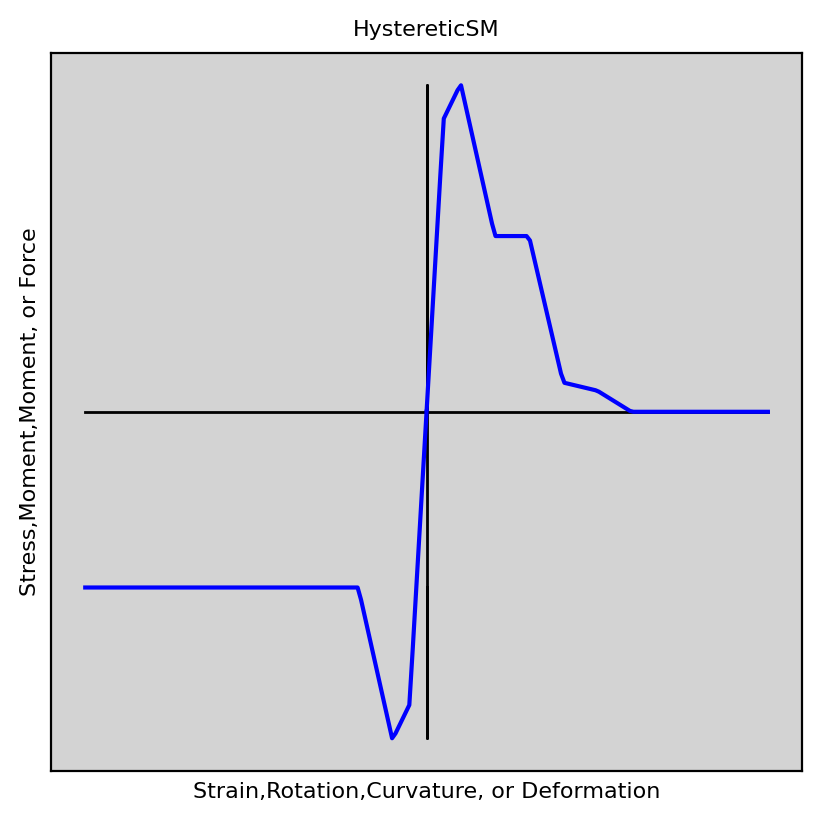

--------------------------------------------
HystereticSMsymm
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12


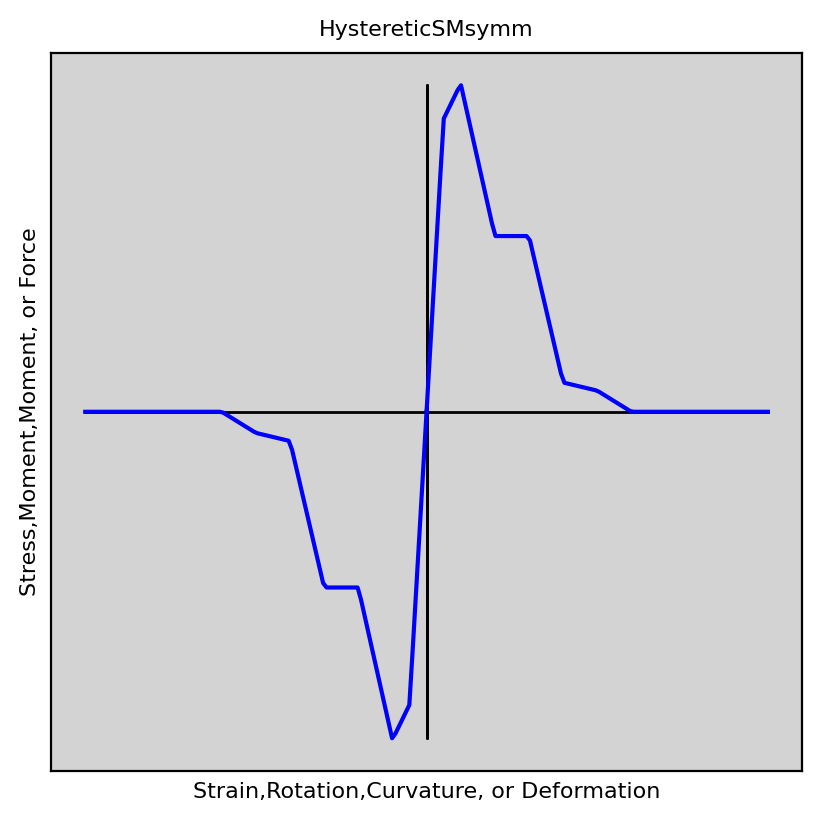

In [6]:
AllStressStrain = {}
allStrainArrayPush = ['strainPush','strainPull']
figSizeH = 4
figSizeV = 4
DPI = 200

for thisMaterial in OpenSeesMaterialBaseValues.keys():
    print('--------------------------------------------')
    print(thisMaterial)
    figEach = plt.figure(f'Material Response Each {thisMaterial}',figsize=(figSizeH,figSizeV), dpi=DPI, facecolor='w', edgecolor='k' )
    axEach = figEach.add_subplot(1,1,1)
    
    istrain = 0
    for thisStrainLabel in allStrainArrayPush:
        thisStrain = strainMap[thisStrainLabel]
        ops.wipe()
        materialTag = 99
        istrain +=1
        
        inputArray = OpenSeesMaterialBaseValues[thisMaterial]

        MaterialInput = inputArray[0],materialTag,*inputArray[1:]
        print(f'ops.uniaxialMaterial{MaterialInput}')
        MaterialInputTcl = str(MaterialInput).replace(',',' ').replace('(','').replace(')','').replace("'",'')
        print(f'uniaxialMaterial {MaterialInputTcl}')

        ops.uniaxialMaterial(*MaterialInput)
    
        ops.testUniaxialMaterial(materialTag)
        stress = []
        MUy = []
        for eps in thisStrain:
            ops.setStrain(eps)
            stress.append(ops.getStress())
            tangent = ops.getTangent() # Not used
    
    
        thisCount = len(list(AllStressStrain.keys()))
        thisKey = 'Run' + str(thisCount+1) + ' ' + thisMaterial
        AllStressStrain[thisKey] = {}
        AllStressStrain[thisKey]['strain'] = thisStrain
        AllStressStrain[thisKey]['stress'] = stress
        
        MaterialInputStr = str(MaterialInput).replace(',',',\n')
        
        
        zeros = np.zeros(len(AllStressStrain[thisKey]['strain']))
        line, = axEach.plot(zeros,AllStressStrain[thisKey]['stress'],'k-',linewidth='1.0',marker = '')
        line, = axEach.plot(AllStressStrain[thisKey]['strain'], zeros,'k-',linewidth='1.0',marker = '')
        line, = axEach.plot(AllStressStrain[thisKey]['strain'], AllStressStrain[thisKey]['stress'],'b',linewidth='1.5',marker = '')
    formatAx(axEach,thisMaterial,'Strain,Rotation,Curvature, or Deformation','Stress,Moment,Moment, or Force',8,8,'best','lightgrey',4)
    plt.xticks([]) 
    plt.yticks([]) 
    figEach.tight_layout()
    plt.show()
    figFilename = f'D:\\Projects\\OpenSees\\Development\\_JupyterNotebooks\\HystereticSM\\{thisMaterial}_{thisStrainLabel}.jpg' 

        

## Analysis Set 2: Cyclic

--------------------------------------------
HystereticSM_pinch=[1, 1]
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-pinch', 1, 1)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -pinch  1  1
--------------------------------------------
HystereticSM_pinch=[0.2, 0.8]
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-pinch', 0.2, 0.8)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -pinch  0.2  0.8
----

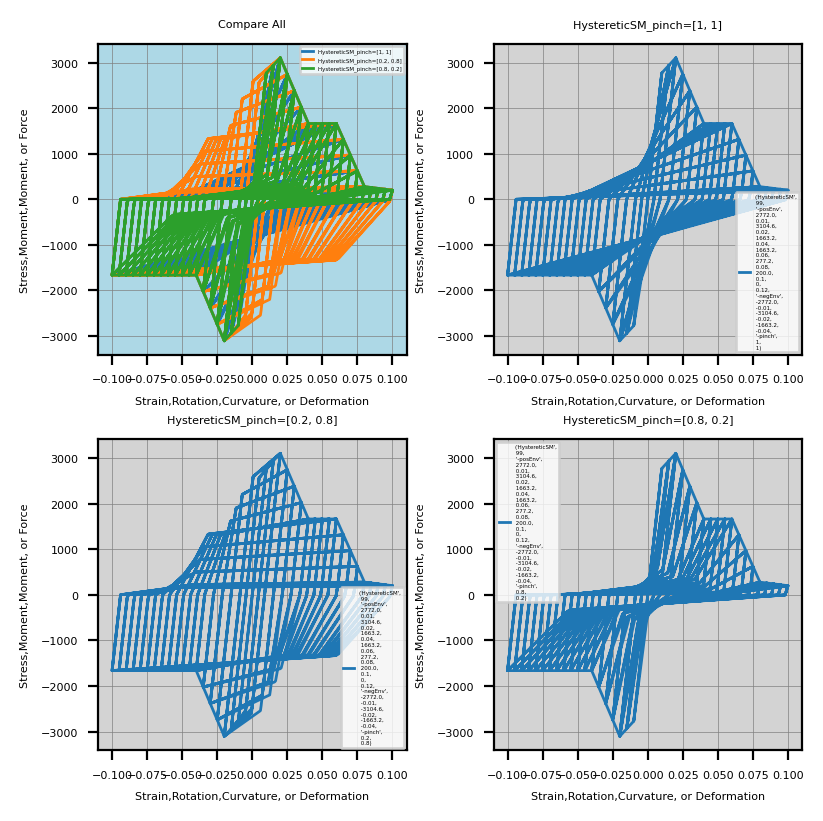

--------------------------------------------
HystereticSM_damage1=0
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-damage', 0, 0)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -damage  0  0
--------------------------------------------
HystereticSM_damage1=0.01
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-damage', 0.01, 0)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -damage  0.01  0
---------

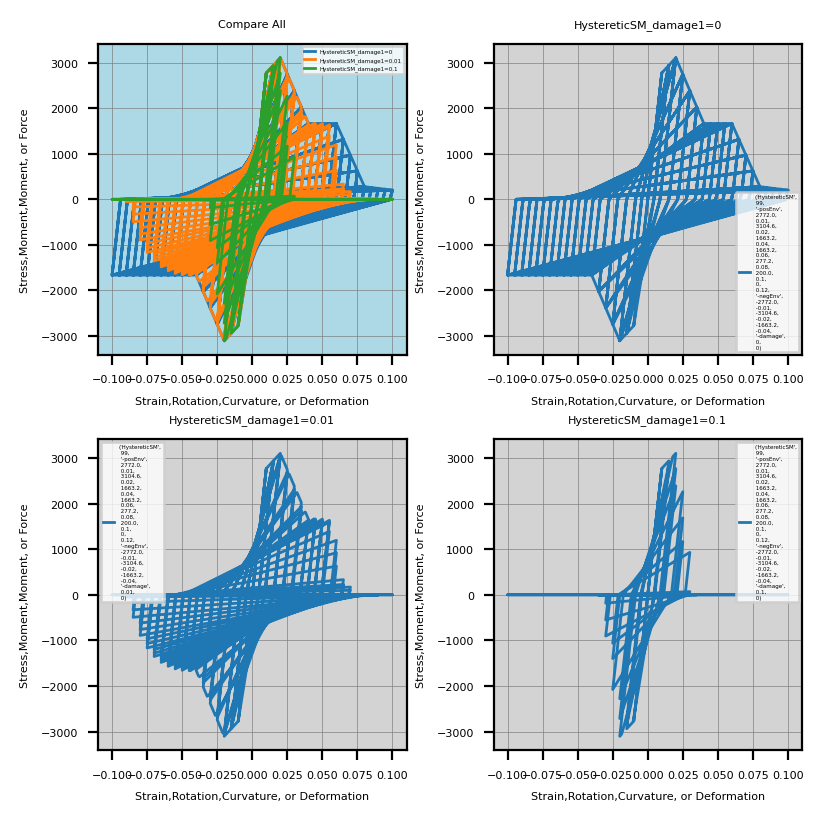

--------------------------------------------
HystereticSM_damage2=0
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-damage', 0, 0)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -damage  0  0
--------------------------------------------
HystereticSM_damage2=0.01
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-damage', 0, 0.01)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -damage  0  0.01
---------

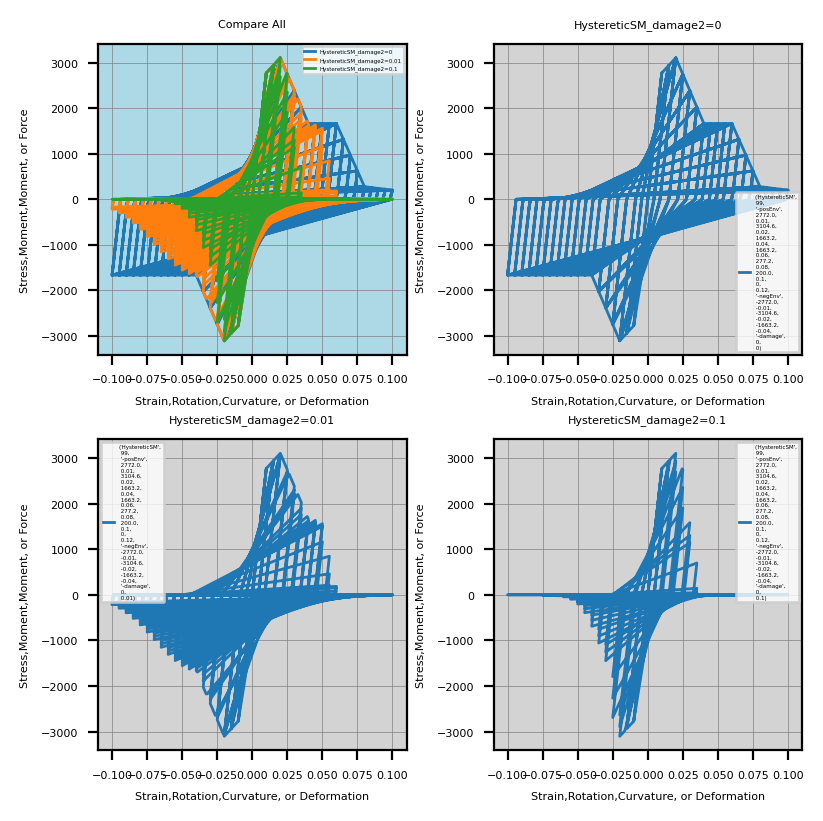

--------------------------------------------
HystereticSM_beta=0
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-beta', 0)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -beta  0
--------------------------------------------
HystereticSM_beta=0.5
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-beta', 0.5)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -beta  0.5
--------------------------------------

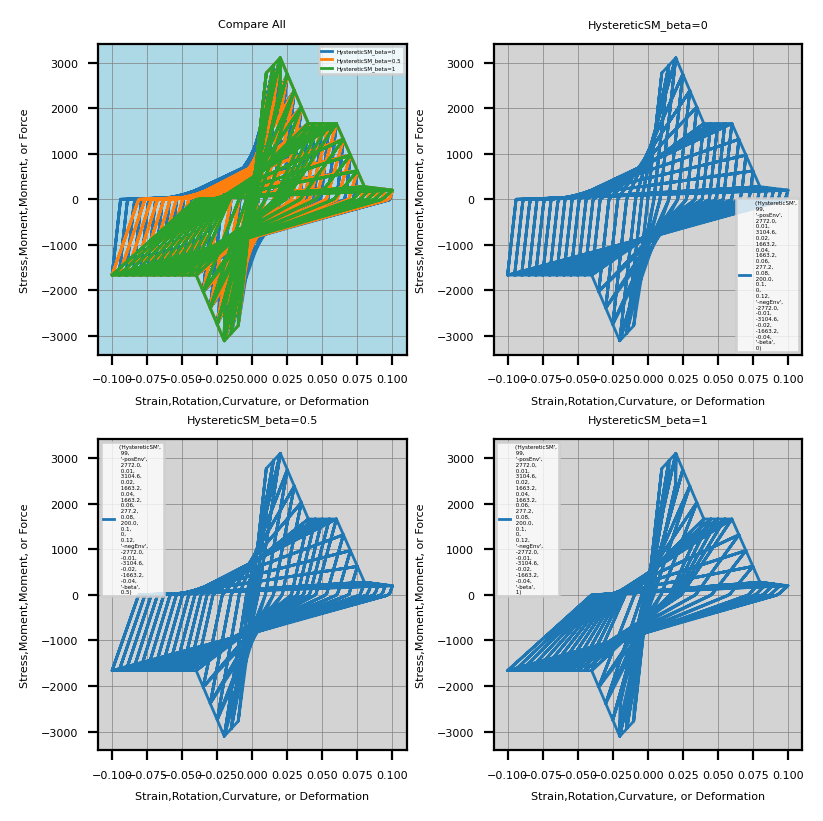

--------------------------------------------
HystereticSM_degEnv=0
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-damage', 0.005, 0.002, '-degEnv', 0, 0)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -damage  0.005  0.002  -degEnv  0  0
--------------------------------------------
HystereticSM_degEnv=1
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-damage', 0.005, 0.002, '-degEnv', 1, -1)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0 

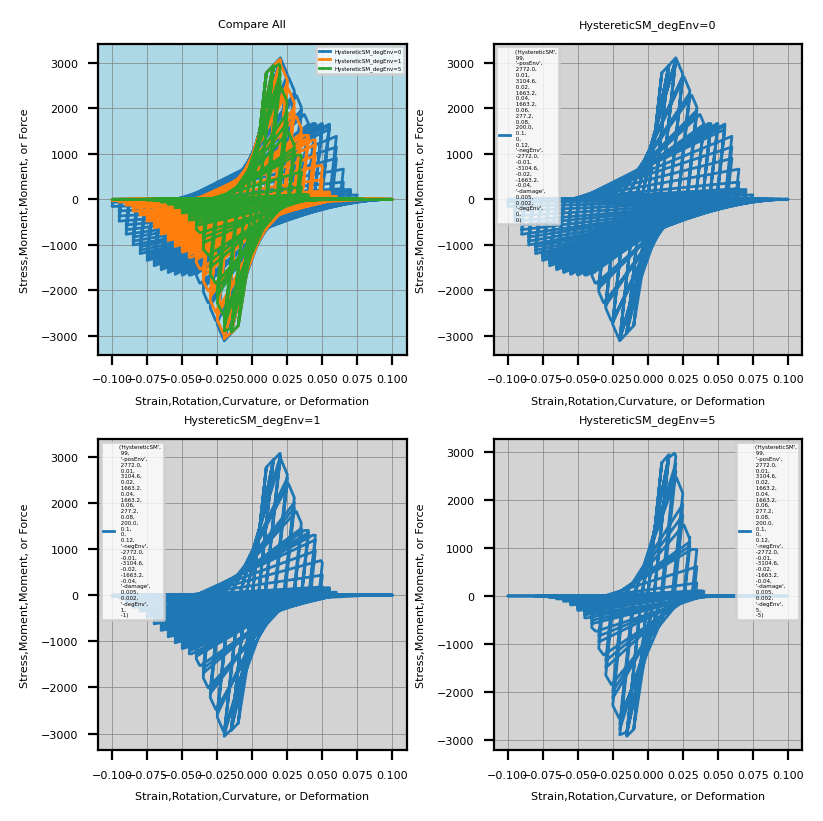

--------------------------------------------
HystereticSM_pinch=[1, 1]
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-pinch', 1, 1)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -pinch  1  1
--------------------------------------------
HystereticSM_pinch=[0.2, 0.8]
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-pinch', 0.2, 0.8)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -pinch  0.2  0.8
----

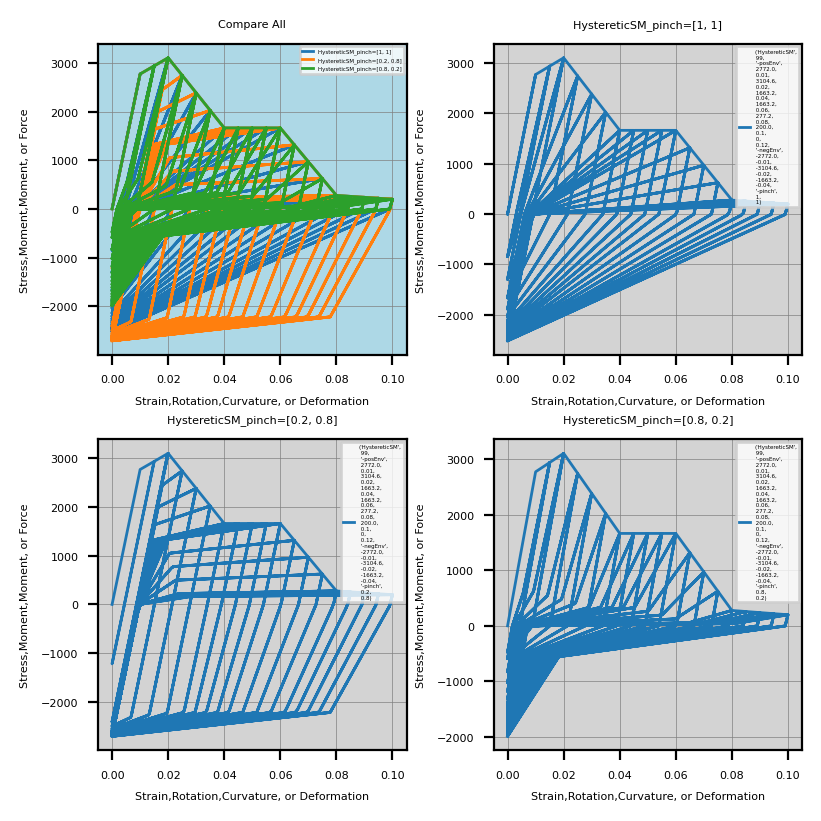

--------------------------------------------
HystereticSM_damage1=0
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-damage', 0, 0)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -damage  0  0
--------------------------------------------
HystereticSM_damage1=0.01
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-damage', 0.01, 0)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -damage  0.01  0
---------

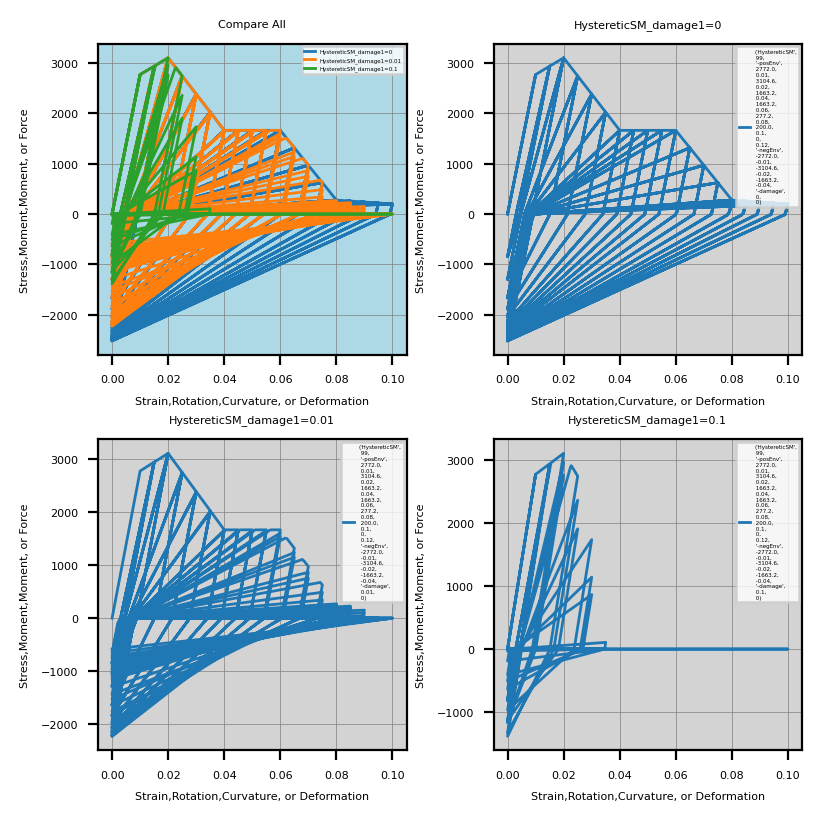

--------------------------------------------
HystereticSM_damage2=0
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-damage', 0, 0)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -damage  0  0
--------------------------------------------
HystereticSM_damage2=0.01
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-damage', 0, 0.01)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -damage  0  0.01
---------

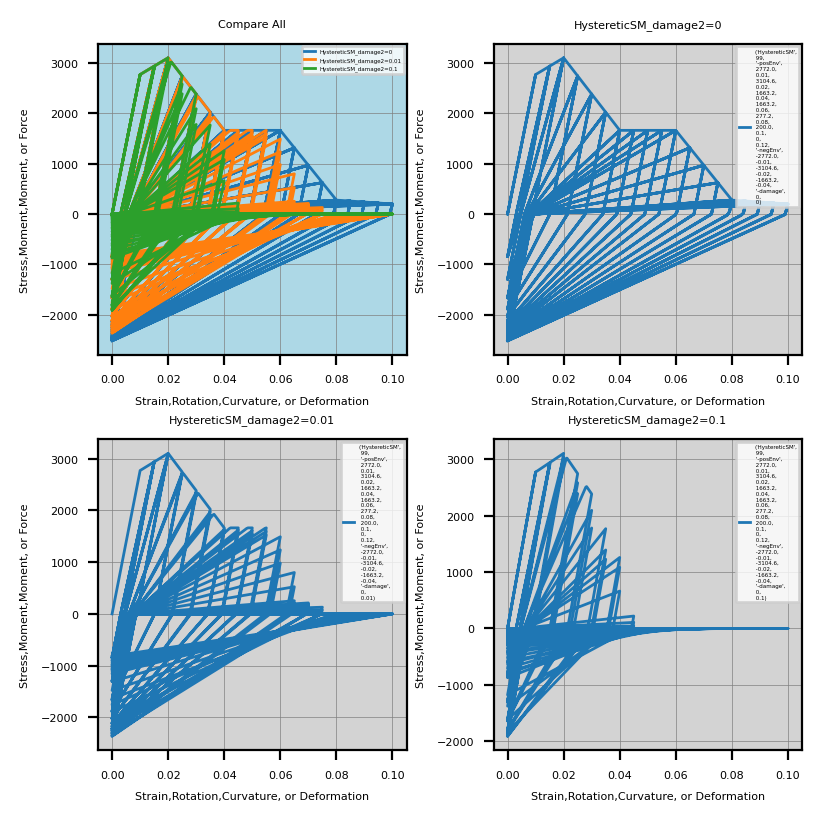

--------------------------------------------
HystereticSM_beta=0
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-beta', 0)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -beta  0
--------------------------------------------
HystereticSM_beta=0.5
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-beta', 0.5)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -beta  0.5
--------------------------------------

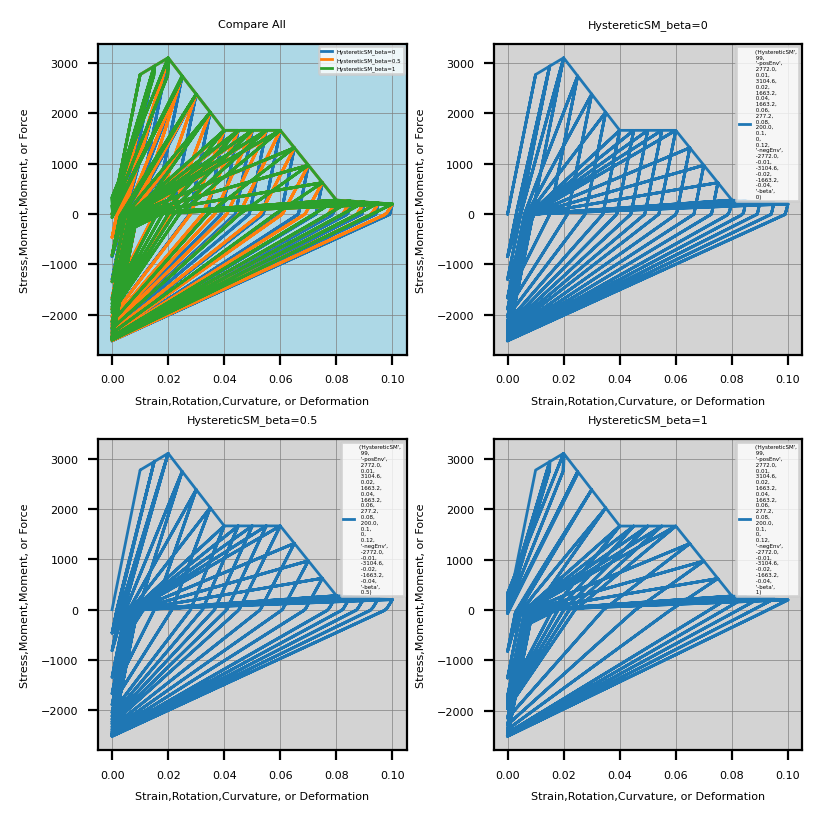

--------------------------------------------
HystereticSM_degEnv=0
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-damage', 0.005, 0.002, '-degEnv', 0, 0)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -damage  0.005  0.002  -degEnv  0  0
--------------------------------------------
HystereticSM_degEnv=1
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-damage', 0.005, 0.002, '-degEnv', 1, -1)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0 

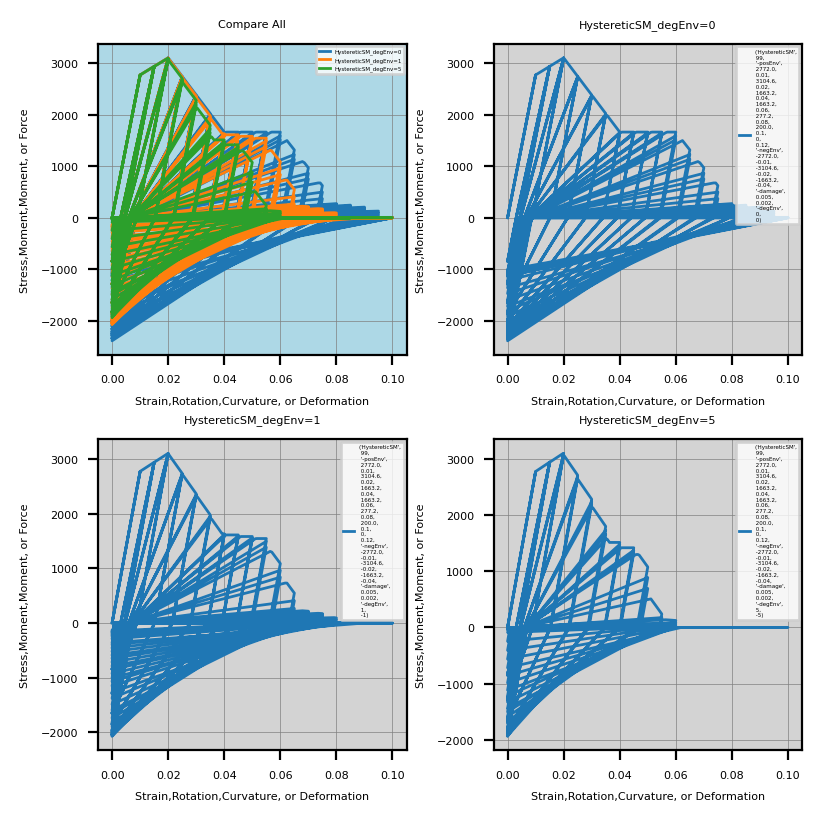

--------------------------------------------
HystereticSM_pinch=[1, 1]
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-pinch', 1, 1)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -pinch  1  1
--------------------------------------------
HystereticSM_pinch=[0.2, 0.8]
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-pinch', 0.2, 0.8)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -pinch  0.2  0.8
----

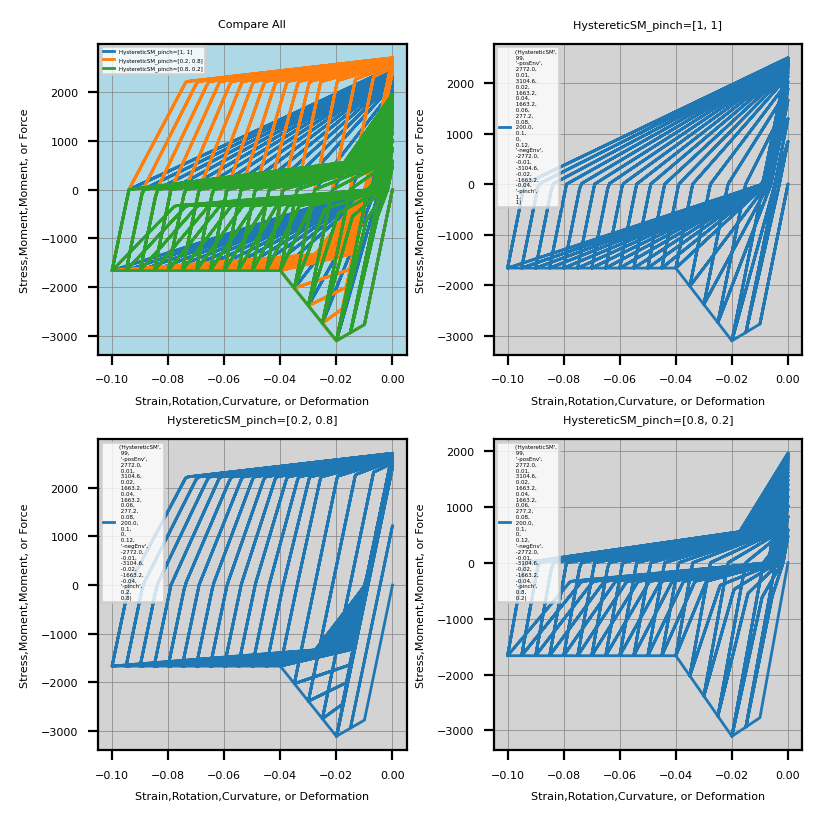

--------------------------------------------
HystereticSM_damage1=0
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-damage', 0, 0)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -damage  0  0
--------------------------------------------
HystereticSM_damage1=0.01
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-damage', 0.01, 0)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -damage  0.01  0
---------

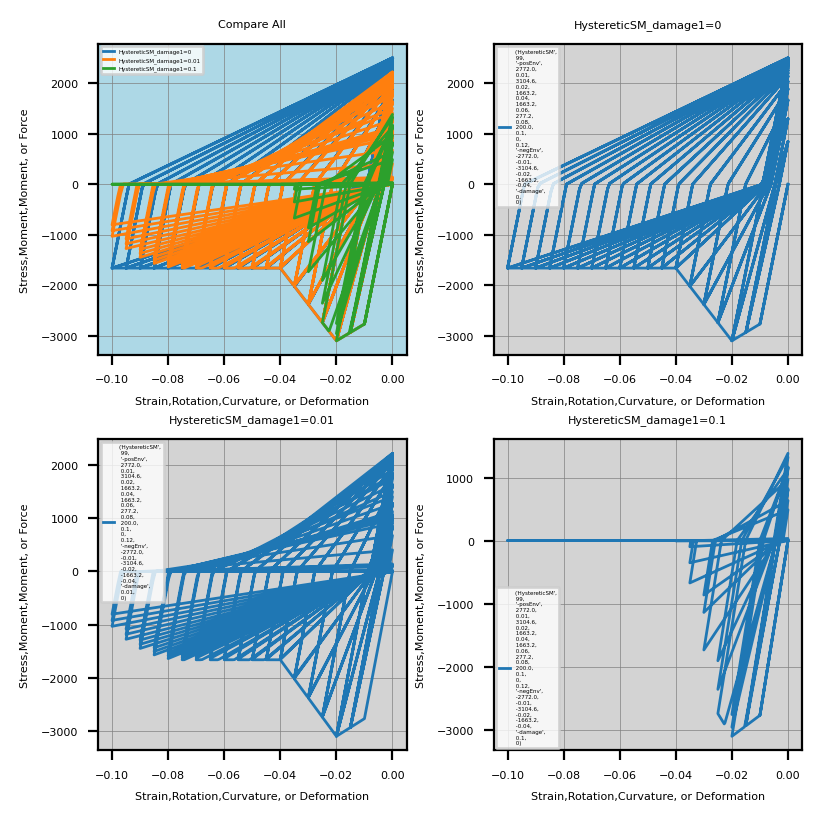

--------------------------------------------
HystereticSM_damage2=0
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-damage', 0, 0)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -damage  0  0
--------------------------------------------
HystereticSM_damage2=0.01
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-damage', 0, 0.01)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -damage  0  0.01
---------

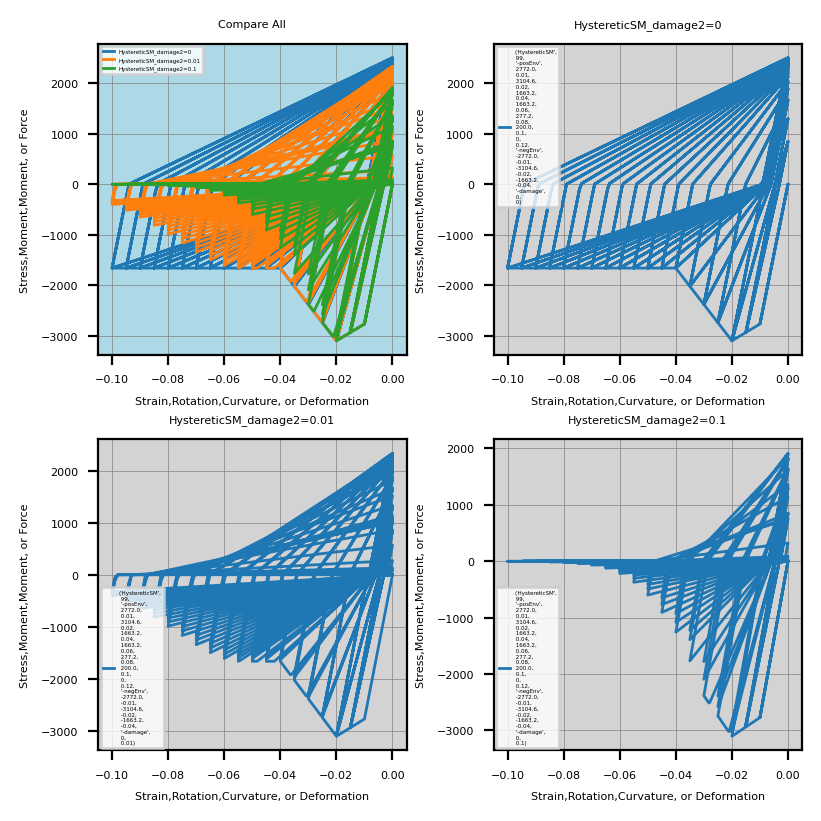

--------------------------------------------
HystereticSM_beta=0
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-beta', 0)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -beta  0
--------------------------------------------
HystereticSM_beta=0.5
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-beta', 0.5)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -beta  0.5
--------------------------------------

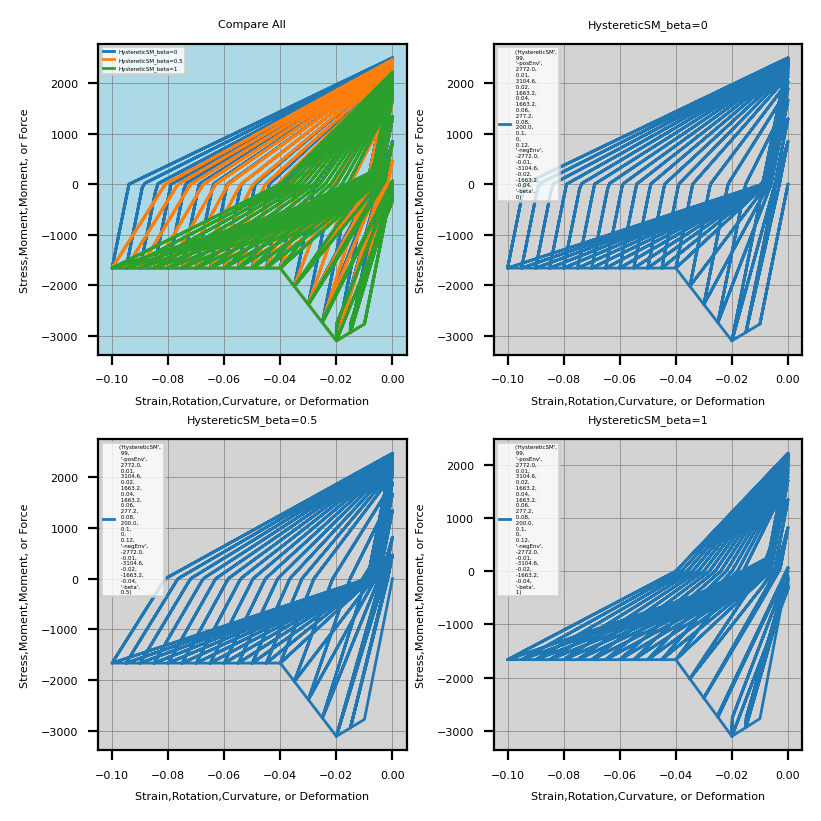

--------------------------------------------
HystereticSM_degEnv=0
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-damage', 0.005, 0.002, '-degEnv', 0, 0)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -damage  0.005  0.002  -degEnv  0  0
--------------------------------------------
HystereticSM_degEnv=1
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-damage', 0.005, 0.002, '-degEnv', 1, -1)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0 

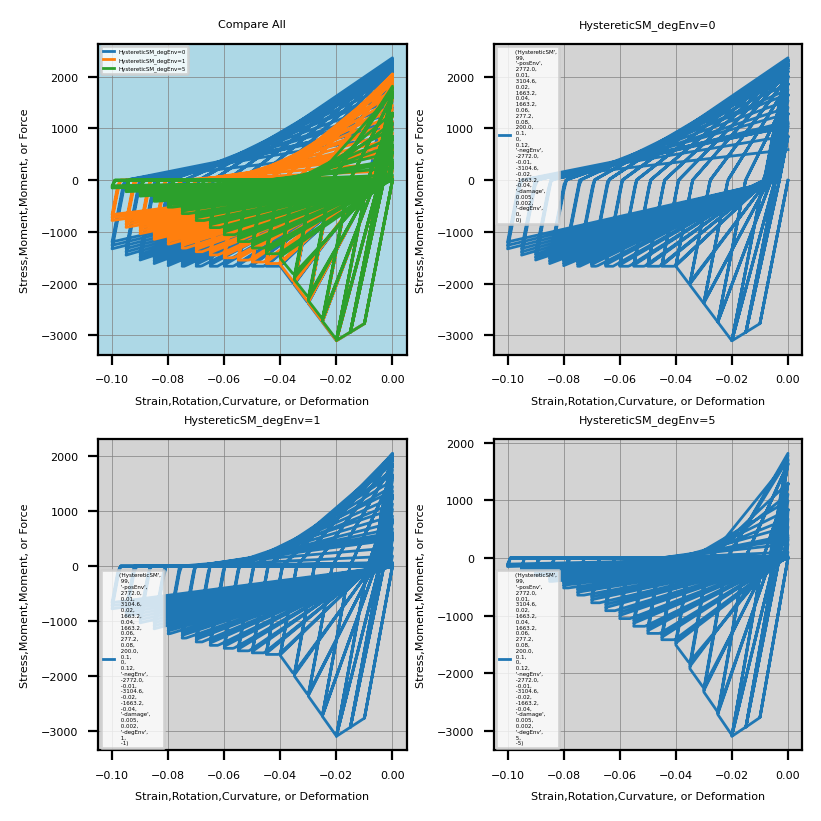

--------------------------------------------
HystereticSM_pinch=[1, 1]
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-pinch', 1, 1)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -pinch  1  1
--------------------------------------------
HystereticSM_pinch=[0.2, 0.8]
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-pinch', 0.2, 0.8)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -pinch  0.2  0.8
----

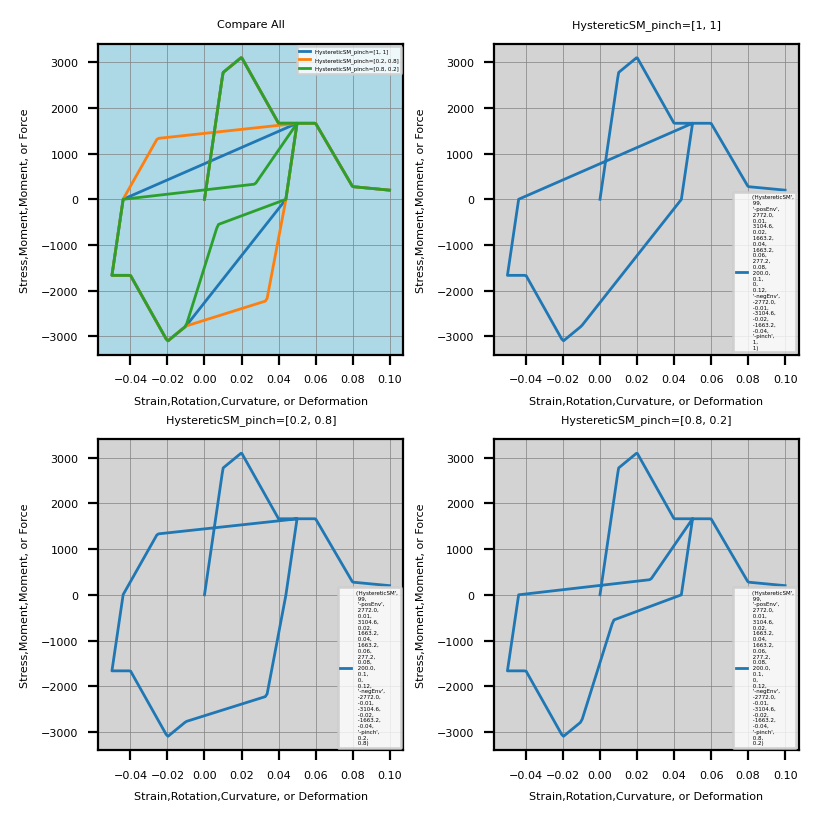

--------------------------------------------
HystereticSM_damage1=0
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-damage', 0, 0)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -damage  0  0
--------------------------------------------
HystereticSM_damage1=0.01
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-damage', 0.01, 0)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -damage  0.01  0
---------

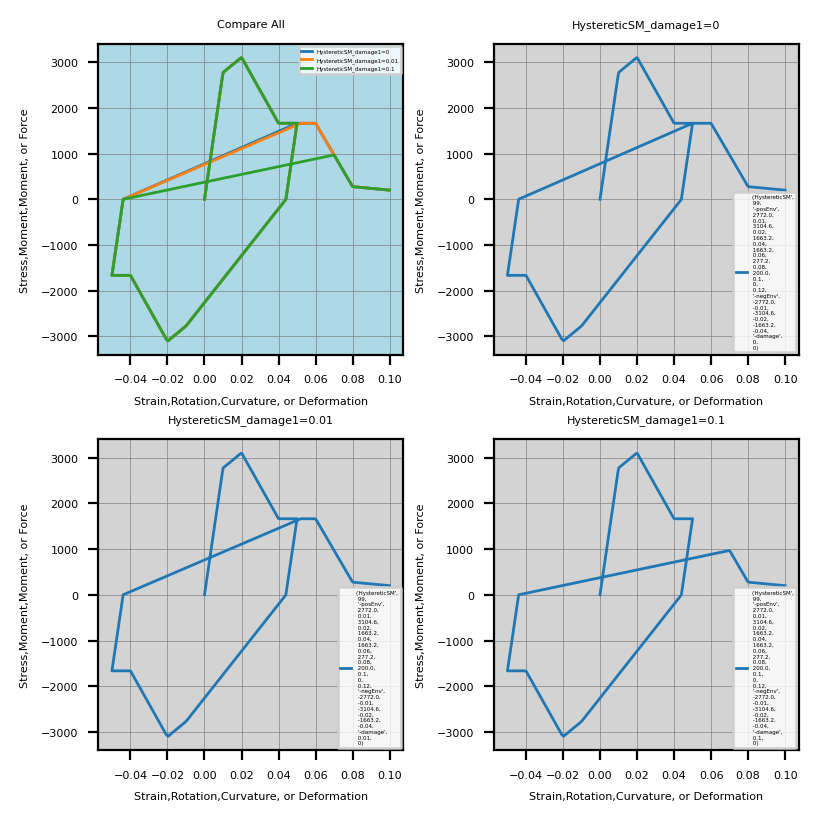

--------------------------------------------
HystereticSM_damage2=0
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-damage', 0, 0)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -damage  0  0
--------------------------------------------
HystereticSM_damage2=0.01
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-damage', 0, 0.01)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -damage  0  0.01
---------

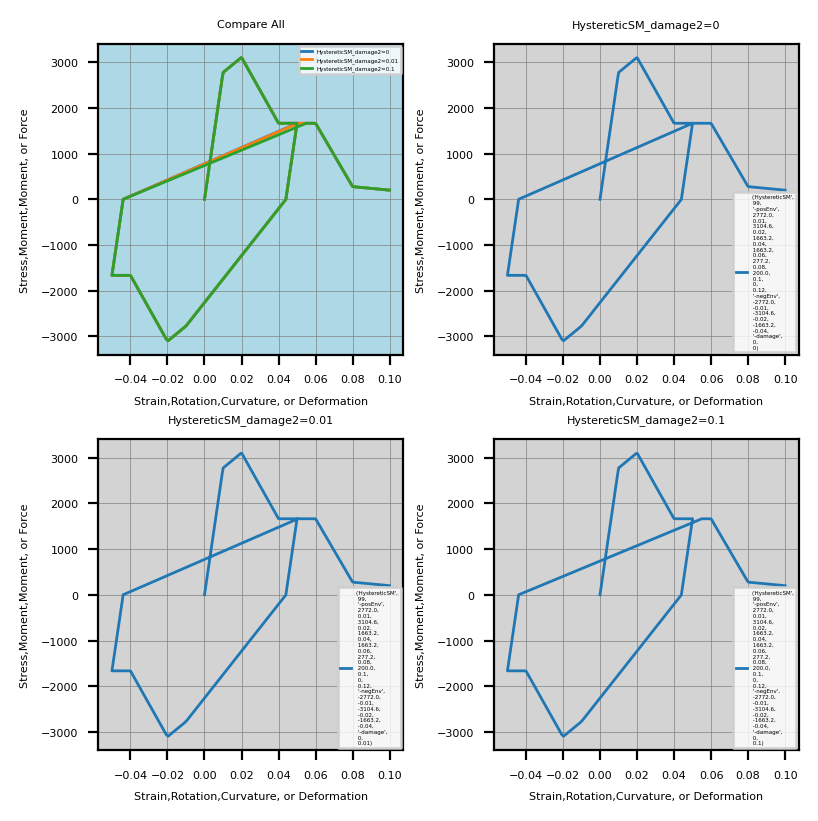

--------------------------------------------
HystereticSM_beta=0
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-beta', 0)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -beta  0
--------------------------------------------
HystereticSM_beta=0.5
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-beta', 0.5)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -beta  0.5
--------------------------------------

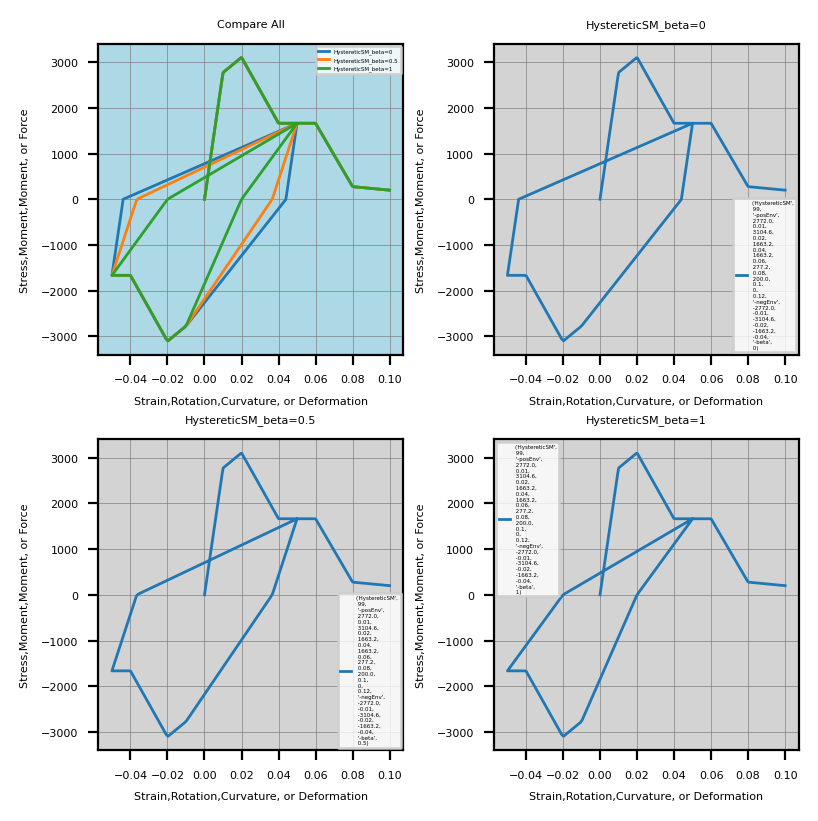

--------------------------------------------
HystereticSM_degEnv=0
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-damage', 0.005, 0.002, '-degEnv', 0, 0)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0  -0.01  -3104.6  -0.02  -1663.2  -0.04  -damage  0.005  0.002  -degEnv  0  0
--------------------------------------------
HystereticSM_degEnv=1
ops.uniaxialMaterial('HystereticSM', 99, '-posEnv', 2772.0, 0.01, 3104.6, 0.02, 1663.2, 0.04, 1663.2, 0.06, 277.2, 0.08, 200.0, 0.1, 0, 0.12, '-negEnv', -2772.0, -0.01, -3104.6, -0.02, -1663.2, -0.04, '-damage', 0.005, 0.002, '-degEnv', 1, -1)
uniaxialMaterial HystereticSM  99  -posEnv  2772.0  0.01  3104.6  0.02  1663.2  0.04  1663.2  0.06  277.2  0.08  200.0  0.1  0  0.12  -negEnv  -2772.0 

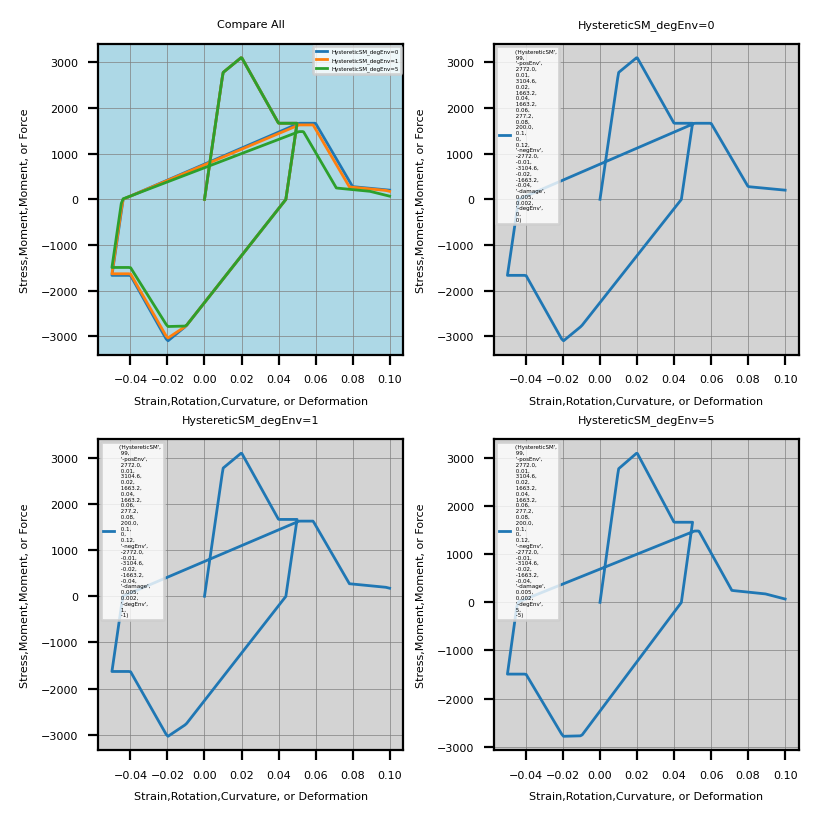

In [7]:
AllStressStrain = {}

Nmaterials = len(OpenSeesMaterialDefaultValues.keys())
Ncols = 2
Nrows = int(Nmaterials/Ncols)
Nrows = 2
    
figSizeH = 2*Ncols
figSizeV = 2*Nrows
DPI = 200

thisCount = 0
allStrainArray = ['symmCycles',  'strainOneSidedPush', 'strainOneSidedPull','strainDip']
iStrain = 0
for thisStrainLabel in allStrainArray:
    thisStrain = strainMap[thisStrainLabel]
    iStrain += 1
    iplt = 1
    for thisMaterial in OpenSeesMaterialDefaultValues.keys():
        print('--------------------------------------------')
        print(thisMaterial)
        if iplt == 1:
            figEach = plt.figure(f'Material Response Each {thisMaterial} {thisStrainLabel}',figsize=(figSizeH,figSizeV), dpi=DPI, facecolor='w', edgecolor='k' )
            axAll = figEach.add_subplot(Nrows,Ncols,1)
        iplt += 1
        axEach = figEach.add_subplot(Nrows,Ncols,iplt)
            
        counter = thisCount + 1
        ops.wipe()
        materialTag = 99
        
        inputArray = OpenSeesMaterialDefaultValues[thisMaterial]
        
        MaterialInput = inputArray[0],materialTag,*inputArray[1:]
        print(f'ops.uniaxialMaterial{MaterialInput}')
        MaterialInputTcl = str(MaterialInput).replace(',',' ').replace('(','').replace(')','').replace("'",'')
        print(f'uniaxialMaterial {MaterialInputTcl}')
        ops.uniaxialMaterial(*MaterialInput)
    
        ops.testUniaxialMaterial(materialTag)
        stress = []
        MUy = []
        for eps in thisStrain:
            ops.setStrain(eps)
            stress.append(ops.getStress())
            tangent = ops.getTangent() # Not used
    
    
        thisCount = len(list(AllStressStrain.keys()))
        thisKey = 'Run' + str(thisCount+1) + ' ' + thisMaterial
        AllStressStrain[thisKey] = {}
        AllStressStrain[thisKey]['strain'] = thisStrain
        AllStressStrain[thisKey]['stress'] = stress
        
        MaterialInputStr = str(MaterialInput).replace(',',',\n')
        line, = axAll.plot(AllStressStrain[thisKey]['strain'], AllStressStrain[thisKey]['stress'],linewidth='1',label=thisMaterial,marker = '')
        line, = axEach.plot(AllStressStrain[thisKey]['strain'], AllStressStrain[thisKey]['stress'],linewidth='1',label=MaterialInputStr,marker = '')
        formatAx(axEach,thisMaterial,'Strain,Rotation,Curvature, or Deformation','Stress,Moment,Moment, or Force',4,4,'best','lightgrey',2)
        if iplt == 4:
            figEach.tight_layout()
            formatAx(axAll,"Compare All",'Strain,Rotation,Curvature, or Deformation','Stress,Moment,Moment, or Force',4, 4,'best','lightblue',2)
            plt.show()
            iplt = 1
        
